In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import linear_model as lm
import math

In [101]:
ds = pd.read_csv('house_prices.csv')
ds = ds.drop({'Title','Description','location','Status','Floor','Transaction','Furnishing','facing','overlooking','Super Area','Dimensions','Plot Area','Society','Ownership','Car Parking','Amount(in rupees)'},axis = 'columns')
ds = ds[(ds['Carpet Area'].str.contains('sqft') )==1]
ds['Carpet Area'] = pd.to_numeric(ds['Carpet Area'].str.replace(' sqft',''))
AreaMean = ds['Carpet Area'].mean()
AreaMean = math.floor(AreaMean)
ds['Carpet Area'] = ds['Carpet Area'].fillna(AreaMean)

PriceMean = ds['Price (in rupees)'].mean()
ds['Price (in rupees)'] = ds['Price (in rupees)'].fillna(math.floor(PriceMean))

# Balcony
ds['Balcony'] = ds['Balcony'].str.extract(r'(\d+)').astype(float)
BalconyMean = ds['Balcony'].mean()
ds['Balcony'] = ds['Balcony'].fillna(math.floor(BalconyMean))

# Balcony
ds['Bathroom'] = ds['Bathroom'].str.extract(r'(\d+)').astype(float)
BathroomMean = ds['Bathroom'].mean()
ds['Bathroom'] = ds['Bathroom'].fillna(math.floor(BathroomMean))

ds = ds.dropna()
print(ds.shape)
ds.head(10)



(100428, 5)


,Index,Price (in rupees),Carpet Area,Bathroom,Balcony
0,0,6000.0,500,1.0,2.0
1,1,13799.0,473,2.0,2.0
2,2,17500.0,779,2.0,2.0
3,3,8220.0,530,1.0,1.0
4,4,18824.0,635,2.0,2.0
6,6,2538.0,550,1.0,2.0
9,9,11150.0,900,3.0,1.0
10,10,12174.0,950,2.0,2.0
13,13,17526.0,1820,4.0,1.0
15,15,10000.0,675,2.0,1.0


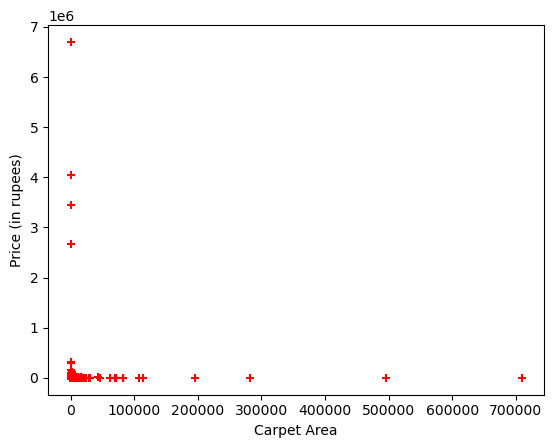

In [87]:
%matplotlib inline
mpl.xlabel('Carpet Area')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Carpet Area'],ds['Price (in rupees)'], color = 'red', marker = '+')

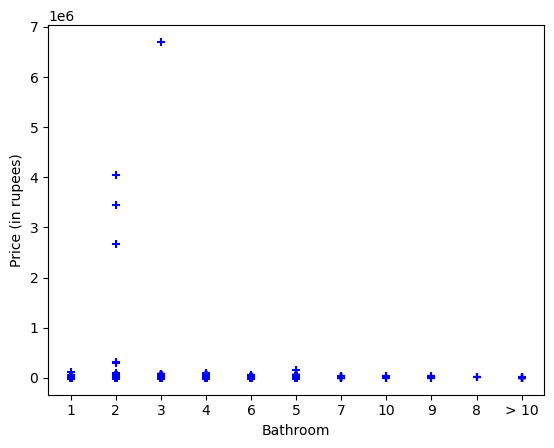

In [88]:
%matplotlib inline
mpl.xlabel('Bathroom')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Bathroom'],ds['Price (in rupees)'], color = 'blue', marker = '+')

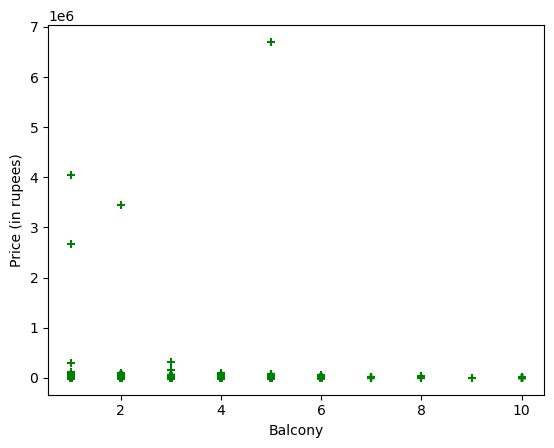

In [89]:
%matplotlib inline
mpl.xlabel('Balcony')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Balcony'],ds['Price (in rupees)'], color = 'green', marker = '+')

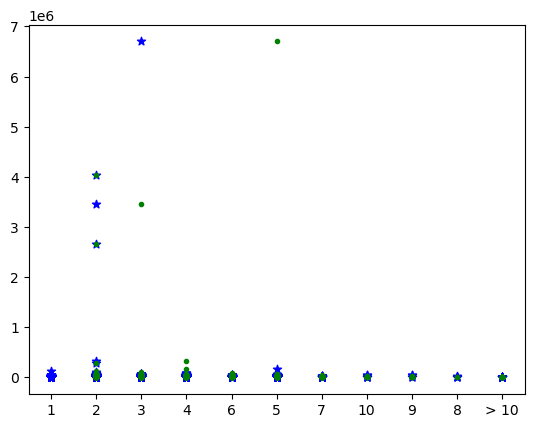

In [95]:
mpl.scatter(ds['Carpet Area'],ds['Price (in rupees)'], color = 'red', marker = '+')
mpl.scatter(ds['Bathroom'],ds['Price (in rupees)'], color = 'blue', marker = '*')
mpl.scatter(ds['Balcony'],ds['Price (in rupees)'], color = 'green', marker = '.')

In [102]:
model = lm.LinearRegression()
model.fit(ds[['Carpet Area','Bathroom','Balcony']], ds['Price (in rupees)'])


LinearRegression()

In [105]:
model.predict([[600,6,5]])

C:\Users\AUC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15692.06715736])

In [106]:
model.coef_

array([-4.62712540e-03,  1.57706864e+03,  6.62794127e+02])

In [107]:
model.intercept_

2918.4609779293805